In [1]:
from google.colab import drive
import tarfile
import os, cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from keras.utils import np_utils
drive.mount('/content/drive'),

Mounted at /content/drive


(None,)

In [2]:
data_path = '/content/drive/MyDrive/facial_expression/jaffe'
data_dir_list = os.listdir(data_path)

img_si=128
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(img_si,img_si))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-ANGRY

Loaded the images of dataset-DISGUST

Loaded the images of dataset-FEAR

Loaded the images of dataset-NEUTRAL

Loaded the images of dataset-HAPPY

Loaded the images of dataset-SAD

Loaded the images of dataset-SURPRISE



(213, 128, 128, 3)

In [3]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:58]=1 #29
labels[59:90]=2 #32
labels[91:121]=3 #31
labels[122:151]=4 #30
labels[152:182]=5 #31
labels[183:]=6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

In [4]:
Y = np_utils.to_categorical(labels, num_classes)
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test
#X_train=X_train.reshape(X_train.shape[0],128,128,1)
#X_test=X_test.reshape(X_test.shape[0],128,128,1)
x_test.shape

(43, 128, 128, 3)

In [5]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [6]:
input_shape=(img_si,img_si,3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

In [7]:
input_shape=(img_si,img_si,3)

bmodel = Sequential()
bmodel.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
bmodel.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same'))
bmodel.add(BatchNormalization())
bmodel.add(Activation(activation = 'relu'))
bmodel.add(MaxPooling2D(pool_size=(2, 2)))

bmodel.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
bmodel.add(Conv2D(64, (3, 3), padding='same'))
bmodel.add(BatchNormalization())
bmodel.add(Activation(activation = 'relu'))
bmodel.add(MaxPooling2D(pool_size=(2, 2)))

bmodel.add(Flatten())
bmodel.add(Dense(128, activation = 'relu'))
bmodel.add(Dropout(0.5))
bmodel.add(Dense(7, activation = 'softmax'))

In [8]:
input_shape=(img_si,img_si,3)

cmodel = Sequential()
cmodel.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
cmodel.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same'))
cmodel.add(Dropout(0.25))
cmodel.add(Activation(activation = 'relu'))
cmodel.add(MaxPooling2D(pool_size=(2, 2)))

cmodel.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
cmodel.add(Conv2D(64, (3, 3), padding='same'))
cmodel.add(Dropout(0.25))
cmodel.add(Activation(activation = 'relu'))
cmodel.add(MaxPooling2D(pool_size=(2, 2)))

cmodel.add(Flatten())
cmodel.add(Dense(128, activation = 'relu'))
cmodel.add(Dropout(0.5))
cmodel.add(Dense(7, activation = 'softmax'))

In [9]:
input_shape=(img_si,img_si,3)

dmodel = Sequential()
dmodel.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
dmodel.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same'))
dmodel.add(BatchNormalization())
dmodel.add(Dropout(0.25))
dmodel.add(Activation(activation = 'relu'))
dmodel.add(MaxPooling2D(pool_size=(2, 2)))

dmodel.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
dmodel.add(Conv2D(64, (3, 3), padding='same'))
dmodel.add(BatchNormalization())
dmodel.add(Dropout(0.25))
dmodel.add(Activation(activation = 'relu'))
dmodel.add(MaxPooling2D(pool_size=(2, 2)))

dmodel.add(Flatten())
dmodel.add(Dense(128, activation = 'relu'))
dmodel.add(Dropout(0.5))
dmodel.add(Dense(7, activation = 'softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [11]:
bmodel.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [12]:
cmodel.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [13]:
dmodel.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [14]:
from keras import callbacks
filename='model_train_new.csv'
#filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
filepath = os.path.join('checkpoint', filename)

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [15]:
from keras import callbacks
bfilename='bmodel_train_new.csv'
#filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
bfilepath = os.path.join('checkpoint', bfilename)

bcsv_log=callbacks.CSVLogger(bfilename, separator=',', append=False)
bcheckpoint = callbacks.ModelCheckpoint(bfilepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
bcallbacks_list = [bcsv_log,bcheckpoint]
bcallbacks_list = [bcsv_log]

In [16]:
from keras import callbacks
cfilename='cmodel_train_new.csv'
#filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
cfilepath = os.path.join('checkpoint', cfilename)

ccsv_log=callbacks.CSVLogger(cfilename, separator=',', append=False)
ccheckpoint = callbacks.ModelCheckpoint(cfilepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
ccallbacks_list = [ccsv_log,ccheckpoint]
ccallbacks_list = [ccsv_log]

In [17]:
from keras import callbacks
dfilename='dmodel_train_new.csv'
#filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
dfilepath = os.path.join('checkpoint', dfilename)

dcsv_log=callbacks.CSVLogger(dfilename, separator=',', append=False)
dcheckpoint = callbacks.ModelCheckpoint(dfilepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
dcallbacks_list = [dcsv_log,dcheckpoint]
dcallbacks_list = [dcsv_log]

In [18]:
hist = model.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=checkpoint)

Epoch 1/50
25/25 [==============================] - 46s 51ms/step - loss: 2.2320 - accuracy: 0.1051 - val_loss: 1.9522 - val_accuracy: 0.0930

Epoch 00001: val_accuracy improved from -inf to 0.09302, saving model to checkpoint/model_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_new.csv/assets
Epoch 2/50
25/25 [==============================] - 0s 13ms/step - loss: 1.9497 - accuracy: 0.1456 - val_loss: 1.9507 - val_accuracy: 0.0698

Epoch 00002: val_accuracy did not improve from 0.09302
Epoch 3/50
25/25 [==============================] - 0s 12ms/step - loss: 1.9419 - accuracy: 0.1819 - val_loss: 1.9516 - val_accuracy: 0.2326

Epoch 00003: val_accuracy improved from 0.09302 to 0.23256, saving model to checkpoint/model_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_new.csv/assets
Epoch 4/50
25/25 [==============================] - 0s 12ms/step - loss: 1.8944 - accuracy: 0.2989 - val_loss: 1.9108 - val_accuracy: 0.2093

Epoch 00004: val_ac

In [19]:
bhist = bmodel.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=bcheckpoint)

Epoch 1/50
25/25 [==============================] - 4s 41ms/step - loss: 28.4890 - accuracy: 0.1318 - val_loss: 2.1269 - val_accuracy: 0.0930

Epoch 00001: val_accuracy improved from -inf to 0.09302, saving model to checkpoint/bmodel_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/bmodel_train_new.csv/assets
Epoch 2/50
25/25 [==============================] - 0s 16ms/step - loss: 2.3278 - accuracy: 0.0906 - val_loss: 1.9555 - val_accuracy: 0.1628

Epoch 00002: val_accuracy improved from 0.09302 to 0.16279, saving model to checkpoint/bmodel_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/bmodel_train_new.csv/assets
Epoch 3/50
25/25 [==============================] - 0s 17ms/step - loss: 1.9459 - accuracy: 0.1479 - val_loss: 1.9515 - val_accuracy: 0.1395

Epoch 00003: val_accuracy did not improve from 0.16279
Epoch 4/50
25/25 [==============================] - 0s 13ms/step - loss: 1.9454 - accuracy: 0.1541 - val_loss: 1.9489 - val_accuracy: 0.1395

Epoch 00004: va

In [20]:
chist = cmodel.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=ccheckpoint)

Epoch 1/50
25/25 [==============================] - 2s 34ms/step - loss: 3.0053 - accuracy: 0.0854 - val_loss: 1.9464 - val_accuracy: 0.0930

Epoch 00001: val_accuracy improved from -inf to 0.09302, saving model to checkpoint/cmodel_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/cmodel_train_new.csv/assets
Epoch 2/50
25/25 [==============================] - 0s 16ms/step - loss: 1.9459 - accuracy: 0.1547 - val_loss: 1.9478 - val_accuracy: 0.2093

Epoch 00002: val_accuracy improved from 0.09302 to 0.20930, saving model to checkpoint/cmodel_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/cmodel_train_new.csv/assets
Epoch 3/50
25/25 [==============================] - 0s 14ms/step - loss: 1.9440 - accuracy: 0.1648 - val_loss: 1.9769 - val_accuracy: 0.0465

Epoch 00003: val_accuracy did not improve from 0.20930
Epoch 4/50
25/25 [==============================] - 0s 14ms/step - loss: 1.9378 - accuracy: 0.2314 - val_loss: 1.9491 - val_accuracy: 0.1860

Epoch 00004: val

In [21]:
dhist = dmodel.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=dcheckpoint)

Epoch 1/50
25/25 [==============================] - 2s 34ms/step - loss: 55.6777 - accuracy: 0.0663 - val_loss: 1.9778 - val_accuracy: 0.0930

Epoch 00001: val_accuracy improved from -inf to 0.09302, saving model to checkpoint/dmodel_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/dmodel_train_new.csv/assets
Epoch 2/50
25/25 [==============================] - 0s 20ms/step - loss: 2.1594 - accuracy: 0.1623 - val_loss: 1.9440 - val_accuracy: 0.2791

Epoch 00002: val_accuracy improved from 0.09302 to 0.27907, saving model to checkpoint/dmodel_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/dmodel_train_new.csv/assets
Epoch 3/50
25/25 [==============================] - 0s 18ms/step - loss: 1.9452 - accuracy: 0.1940 - val_loss: 1.9404 - val_accuracy: 0.2791

Epoch 00003: val_accuracy did not improve from 0.27907
Epoch 4/50
25/25 [==============================] - 0s 14ms/step - loss: 2.0016 - accuracy: 0.1496 - val_loss: 1.9416 - val_accuracy: 0.2558

Epoch 00004: va

<Figure size 432x288 with 0 Axes>

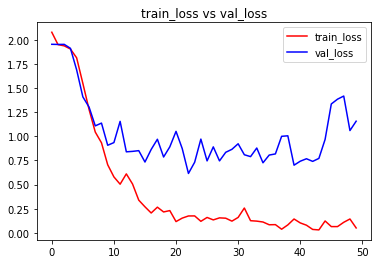

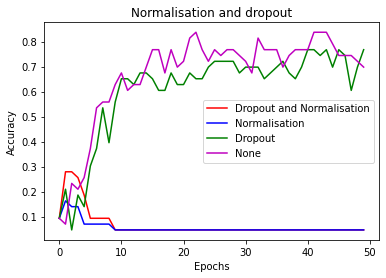

<Figure size 432x288 with 0 Axes>

In [22]:
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
bval_acc=bhist.history['val_accuracy']
cval_acc=chist.history['val_accuracy']
dval_acc=dhist.history['val_accuracy']

epochs = range(len(train_acc))

pyplot.plot(epochs,train_loss,'r', label='train_loss')
pyplot.plot(epochs,val_loss,'b', label='val_loss')
pyplot.title('train_loss vs val_loss')
pyplot.legend()
pyplot.figure()

pyplot.plot(epochs,dval_acc,'r', label='Dropout and Normalisation')
pyplot.plot(epochs,bval_acc,'b', label='Normalisation')
pyplot.plot(epochs,cval_acc,'g', label='Dropout')
pyplot.plot(epochs,val_acc,'m', label='None')
pyplot.title('Normalisation and dropout')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()